In [2]:
import sys
sys.path.insert(0, '../python/casadi_f16')
import f16
import control
import numpy as np
import matplotlib.pyplot as plt
import analysis
from analysis import loop_analysis
from analysis import rlocus
from analysis import step_reponse

# Pitch Autopilot Design

* See Pitch Autopilot design example in section 4.6 of Stevens and Lewis.
* Homework 1: Due 8/30 @  11 pm: Trim the F16 model around a VT=550 ft/s, 20 deg/s yaw rate turn.
* Find the A, B, C, D matrices for the state space model.
* Find the transfer function for the aileron to pitch rate (Q).
* Design a PID controller attempting to meet the following specifications
    * Maximum overshoot: 20%
    * Rise time: 0.1 second
    * Settling time 1 second
* Simulate and plot the response of your controlled system and the linear model for a step response in pitch rate of 10 deg/s and 100 deg/s. How do the nonlinear and linear responses compare?
* Using git, fork aae497-f16 on github. Complete the homework. Submit your homework via pull request on aae497-f16.

# Work
* Set trimming Conditions: $VT=550 ft/s, R = 20 deg/s = \frac{\pi}{9}$ rad/s

In [3]:
p = f16.Parameters()

x0, u0 = f16.trim(x=f16.State(VT=550, R=np.pi/9), p = p,
        phi_dot=0, theta_dot=0, psi_dot=0, gam=0)

* linearize the states and get state matrices

In [4]:
ss = f16.linearize(x0=x0, u0=u0, p0=p)
#ss

* Transfer function of elevator to pitch rate

In [34]:
def select(n, i):
    D = np.zeros((1, n))
    D[0, i] = 1
    return control.ss([], [], [], D)
ss = f16.linearize(x0, u0, p)
s = control.tf([1, 0], [0, 1])
G = -(180/np.pi)*ss.sub_system(x=['alpha', 'Q', 'elv_deg'], 
                               u=['elv_cmd_deg'], y=['alpha', 'Q']).to_control()
sys1 = control.feedback(G, 0.2*10/(s+10)*select(2, 0))
print(sys1)
kvect = np.linspace(1,1000)

A = [[-1.11607665e+00  9.06007222e-01 -2.35158696e-03  0.00000000e+00]
 [ 9.85813115e-01 -1.17939983e+00 -2.10904761e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.02020000e+01  2.31497868e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00000000e+01]]

B = [[    0.        ]
 [    0.        ]
 [-1157.48933772]
 [    0.        ]]

C = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]]

D = [[0.]
 [0.]]



* PI controller and root locus analysis

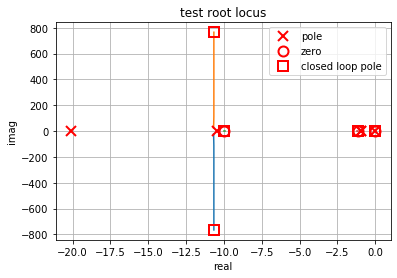

In [69]:
kvect = np.linspace(1,1000)

H = 2.4 + 0.1/s

sys2 = H*sys1[1,0]

analysis.rlocus('test',sys2,kvect);

* Step response

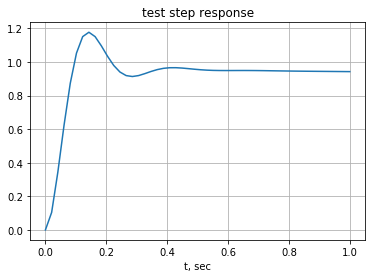

In [79]:
tvect = np.linspace(0,1)
q = analysis.step_reponse('test',sys2/(sys2+1),tvect)